# Q1. To predict if it will rain tomorrow in XYZ country using suitable ML approach.

## 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2. Import Dataset

In [2]:
df=pd.read_csv('weatherAUS.csv')

In [3]:
#Preview of the dataset
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## 3. Exploratory Data Analysis

In [4]:
#View dimensions of dataset 
df.shape

(145460, 23)

In [5]:
#View statistical properties of dataset
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [6]:
#View summary of dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [7]:
#View unique number of values in each column
df.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

In [8]:
#View number of null values in each column
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

## 4. Visualizing Null Values 

<AxesSubplot:>

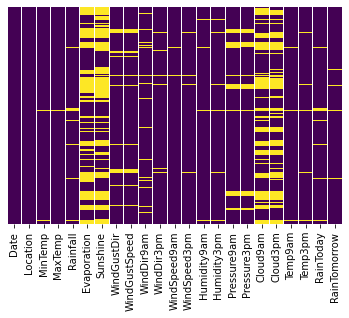

In [9]:
#Plotting a heatmap to analyse the null values in the Dataset
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
#Checking percentage of missing data in every column
(df.isnull().sum()/len(df))*100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [11]:
# find categorical variables
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :', categorical)

There are 7 categorical variables

The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [12]:
#Filling the missing values for continuous variables with mean
df['MinTemp']=df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp']=df['MinTemp'].fillna(df['MaxTemp'].mean())
df['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].mean())
df['Evaporation']=df['Evaporation'].fillna(df['Evaporation'].mean())
df['Sunshine']=df['Sunshine'].fillna(df['Sunshine'].mean())
df['WindGustSpeed']=df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())
df['WindSpeed9am']=df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())
df['WindSpeed3pm']=df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())
df['Humidity9am']=df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm']=df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure9am']=df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm']=df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Cloud9am']=df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm']=df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['Temp9am']=df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm']=df['Temp3pm'].fillna(df['Temp3pm'].mean())

In [13]:
#Filling the missing values for categorical variables with mode
df['RainToday']=df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow']=df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

In [14]:
#Filling the missing values for categorical variables with mode
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])

<AxesSubplot:>

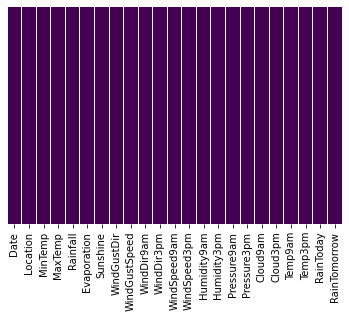

In [15]:
#Plotting a heatmap to check if all the null values are filled
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## 5. Chaniging the values Rain today and Rain Tomorrow

In [16]:
#Changing yes and no to 1 and 0 in some columns
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})
df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})

print(df.RainToday)
print(df.RainTomorrow)

0         0
1         0
2         0
3         0
4         0
         ..
145455    0
145456    0
145457    0
145458    0
145459    0
Name: RainToday, Length: 145460, dtype: int64
0         0
1         0
2         0
3         0
4         0
         ..
145455    0
145456    0
145457    0
145458    0
145459    0
Name: RainTomorrow, Length: 145460, dtype: int64


In [17]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,13.4,0.6,5.468232,7.611178,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,7.4,0.0,5.468232,7.611178,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,12.9,0.0,5.468232,7.611178,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,9.2,0.0,5.468232,7.611178,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,17.5,1.0,5.468232,7.611178,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0


In [18]:
#Dropping date column as it is not necessary for the prediction
df=df.iloc[:,1:]
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,13.4,0.6,5.468232,7.611178,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0
1,Albury,7.4,7.4,0.0,5.468232,7.611178,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0
2,Albury,12.9,12.9,0.0,5.468232,7.611178,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0
3,Albury,9.2,9.2,0.0,5.468232,7.611178,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0
4,Albury,17.5,17.5,1.0,5.468232,7.611178,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0


## 6. Visualizing the Data

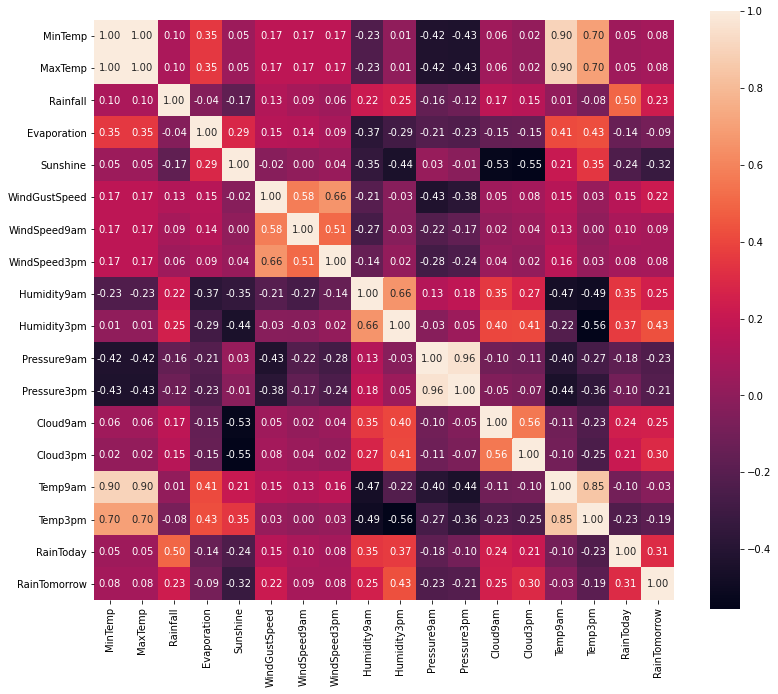

In [19]:
plt.figure(figsize=(13,11))
ax = sns.heatmap(df.corr(), square=True, annot=True, fmt='.2f')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)          
plt.show()

### Count of rain today and tomorrow

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

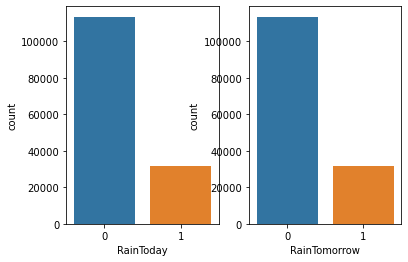

<Figure size 1440x1440 with 0 Axes>

In [20]:
fig, ax =plt.subplots(1,2)
plt.figure(figsize=(20,20))
sns.countplot(data=df,x='RainToday',ax=ax[0])
sns.countplot(data=df,x='RainTomorrow',ax=ax[1])

### Direction of wind at 9 am, 3 pm

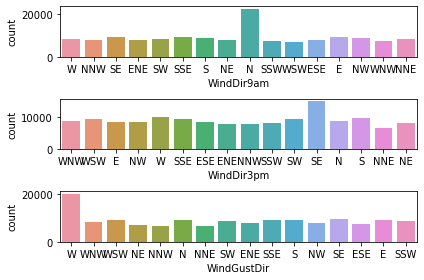

<Figure size 720x720 with 0 Axes>

In [21]:
fig, ax =plt.subplots(3,1)
plt.figure(figsize=(10,10))

sns.countplot(data=df,x='WindDir9am',ax=ax[0])
sns.countplot(data=df,x='WindDir3pm',ax=ax[1])
sns.countplot(data=df,x='WindGustDir',ax=ax[2])
fig.tight_layout()

#### Observations:
- At 9 am, it is highest for direction N.
- At 3 pm, it is highest for direction SE.

### Boxplots for Humidity and Pressure at 3pm and 9am

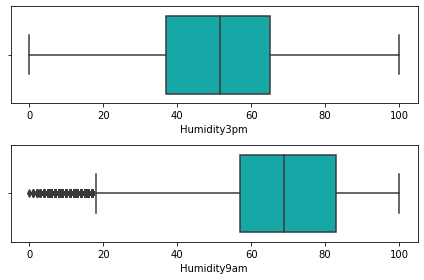

<Figure size 720x720 with 0 Axes>

In [22]:
fig, ax =plt.subplots(2,1)
plt.figure(figsize=(10,10))
sns.boxplot(x=df['Humidity3pm'],color='c',ax=ax[0])
sns.boxplot(x=df['Humidity9am'],color='c',ax=ax[1])
fig.tight_layout()

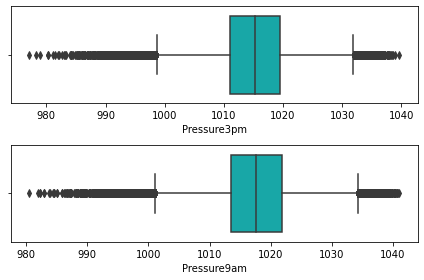

<Figure size 720x720 with 0 Axes>

In [23]:
fig, ax =plt.subplots(2,1)
plt.figure(figsize=(10,10))
sns.boxplot(x=df['Pressure3pm'],color='c',ax=ax[0])
sns.boxplot(x=df['Pressure9am'],color='c',ax=ax[1])
fig.tight_layout()

### ViolinPlots for RainToday vs MaxTemp and MinTemp

<AxesSubplot:xlabel='RainToday', ylabel='MaxTemp'>

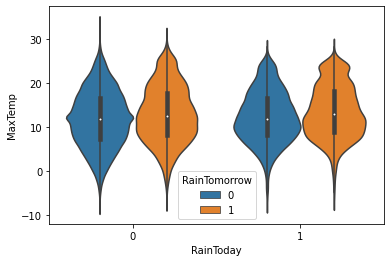

In [24]:
sns.violinplot(x='RainToday',y='MaxTemp',data=df,hue='RainTomorrow')

<AxesSubplot:xlabel='RainToday', ylabel='MinTemp'>

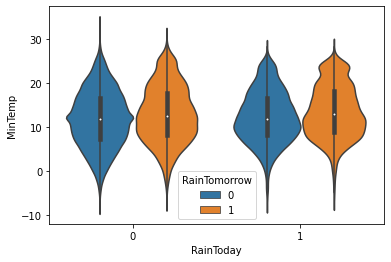

In [25]:
sns.violinplot(x='RainToday',y='MinTemp',data=df,hue='RainTomorrow')

## 7. Encoding the categorical variables

In [26]:
#Encoding the categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Location'] = le.fit_transform(df['Location'])
df['WindDir9am'] = le.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = le.fit_transform(df['WindDir3pm'])
df['WindGustDir'] = le.fit_transform(df['WindGustDir'])
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2,13.4,13.4,0.6,5.468232,7.611178,13,44.0,13,14,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0
1,2,7.4,7.4,0.0,5.468232,7.611178,14,44.0,6,15,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0
2,2,12.9,12.9,0.0,5.468232,7.611178,15,46.0,13,15,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0
3,2,9.2,9.2,0.0,5.468232,7.611178,4,24.0,9,0,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0
4,2,17.5,17.5,1.0,5.468232,7.611178,13,41.0,1,7,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0


In [27]:
#Removing the outliers
from scipy import stats
print('Shape of DataFrame Before Removing Outliers', df.shape )
df=df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
print('Shape of DataFrame After Removing Outliers', df.shape )

Shape of DataFrame Before Removing Outliers (145460, 22)
Shape of DataFrame After Removing Outliers (136653, 22)


In [28]:
#Dropping highly correlated columns
#df=df.drop(['Temp3pm','Temp9am','Humidity9am'],axis=1)
#df.columns

In [29]:
#importing all necessary libraries for training the model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

## 8. Feature Scaling

In [30]:
#Scaling the data to fit the modedl
scale = MinMaxScaler()

In [31]:
scaled_df = scale.fit_transform(df.drop('RainTomorrow',axis=1))
scaled_df

array([[0.04166667, 0.53562005, 0.53562005, ..., 0.49740933, 0.50243902,
        0.        ],
       [0.04166667, 0.37730871, 0.37730871, ..., 0.50518135, 0.56341463,
        0.        ],
       [0.04166667, 0.52242744, 0.52242744, ..., 0.60362694, 0.53658537,
        0.        ],
       ...,
       [0.85416667, 0.32453826, 0.32453826, ..., 0.38341969, 0.60731707,
        0.        ],
       [0.85416667, 0.3878628 , 0.3878628 , ..., 0.4507772 , 0.60487805,
        0.        ],
       [0.85416667, 0.57519789, 0.57519789, ..., 0.44818653, 0.4804878 ,
        0.        ]])

In [32]:
#creating the dataframe with the scaled array data
scaled_df = pd.DataFrame(scaled_df,columns=df.columns[:-1])
scaled_df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,0.041667,0.535620,0.535620,0.021898,0.366995,0.524909,0.866667,0.527778,0.866667,0.933333,...,0.545455,0.666667,0.212121,0.253102,0.295739,0.888889,0.501103,0.497409,0.502439,0.0
1,0.041667,0.377309,0.377309,0.000000,0.366995,0.524909,0.933333,0.527778,0.400000,1.000000,...,0.500000,0.356322,0.242424,0.325062,0.313283,0.494162,0.501103,0.505181,0.563415,0.0
2,0.041667,0.522427,0.522427,0.000000,0.366995,0.524909,1.000000,0.555556,0.866667,1.000000,...,0.590909,0.287356,0.292929,0.250620,0.335840,0.494162,0.222222,0.603627,0.536585,0.0
3,0.041667,0.424802,0.424802,0.000000,0.366995,0.524909,0.266667,0.250000,0.600000,0.000000,...,0.204545,0.367816,0.151515,0.498759,0.438596,0.494162,0.501103,0.528497,0.617073,0.0
4,0.041667,0.643799,0.643799,0.036496,0.366995,0.524909,0.866667,0.486111,0.066667,0.466667,...,0.454545,0.793103,0.323232,0.330025,0.268170,0.777778,0.888889,0.520725,0.695122,0.0


## 9. Model Training and Predicting results

In [33]:
#Train test split
X=scaled_df.iloc[:,:-1] 
y=scaled_df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [34]:
#Function that fits the model and predicts results
def model_prediction(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print('Confusion Matrix: \n',confusion_matrix(y_test, preds))
    print('Accuracy of ', title, ':', round(accuracy_score(y_test, preds), 5))

## Check accuracy score for Logistic Regression and Random Forest Classifier

In [35]:
# instantiate the model
lr = LogisticRegression(max_iter=1000)
#passing the model into the fuction to make predictions
model_prediction(lr, "Logistic Regression")

Confusion Matrix: 
 [[32015   722]
 [ 1236  7023]]
Accuracy of  Logistic Regression : 0.95224


In [36]:
# instantiate the model with Random Forest
rf = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model_prediction(rf, "Random Forest")

Confusion Matrix: 
 [[32633   104]
 [    4  8255]]
Accuracy of  Random Forest : 0.99737


## Check for overfitting and underfitting
### Compare the train-set and test-set accuracy for both models

In [37]:
y_pred_train = lr.predict(X_train)
print('Training-set accuracy score for Logistic Regression mode : {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score for Logistic Regression mode : 0.9531


In [38]:
y_pred_train_rf = rf.predict(X_train)
print('Training-set accuracy score for Random Forest model:: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_rf)))

Training-set accuracy score for Random Forest model:: 0.9988


In [39]:
print('Training set score for Logistic Regression model: {:.4f}'.format(lr.score(X_train, y_train)))
print('Test set score for Logistic Regression model: {:.4f}'.format(lr.score(X_test, y_test)))

Training set score for Logistic Regression model: 0.9531
Test set score for Logistic Regression model: 0.9522


In [40]:
print('Training set score for Random Forest model: {:.4f}'.format(rf.score(X_train, y_train)))
print('Test set score for Random Forest model: {:.4f}'.format(rf.score(X_test, y_test)))

Training set score for Random Forest model: 0.9988
Test set score for Random Forest model: 0.9974


### The training-set accuracy score and the test-set accuracy score are very close to each other in both the models. These two values are quite comparable. So, there is no question of overfitting.

## Classification Reports for both the models

In [41]:
#For logistic Regression Classifier
from sklearn.metrics import classification_report
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     32737
         1.0       0.91      0.85      0.88      8259

    accuracy                           0.95     40996
   macro avg       0.93      0.91      0.92     40996
weighted avg       0.95      0.95      0.95     40996



In [43]:
#For Random Forest Classifier
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     32737
         1.0       0.99      1.00      0.99      8259

    accuracy                           1.00     40996
   macro avg       0.99      1.00      1.00     40996
weighted avg       1.00      1.00      1.00     40996



## Adjusting the threshold level 
- store the the first 10 predicted probabilities of two classes- 0 and 1 probabilities in dataframe
* predict_proba method gives the probabilities for the target variable(0 and 1) in this case, in array form

In [44]:
#with logistic Regression model
pd.DataFrame(data=lr.predict_proba(X_test)[0:10], columns=['Prob of - No rain tomorrow (0)', 'Prob of - Rain tomorrow (1)'])

,Prob of - No rain tomorrow (0),Prob of - Rain tomorrow (1)
0,9.906289e-01,0.009371
1,9.928535e-01,0.007147
2,9.271273e-01,0.072873
3,9.760616e-01,0.023938
4,5.011332e-08,1.000000
5,9.656437e-01,0.034356
6,9.970412e-01,0.002959
7,9.860123e-01,0.013988
8,5.770929e-07,0.999999
9,3.789131e-01,0.621087


In [45]:
#with random forest model
pd.DataFrame(data=rf.predict_proba(X_test)[0:10], columns=['Prob of - No rain tomorrow (0)', 'Prob of - Rain tomorrow (1)'])

,Prob of - No rain tomorrow (0),Prob of - Rain tomorrow (1)
0,0.990417,0.009583
1,0.992163,0.007837
2,0.990346,0.009654
3,0.972156,0.027844
4,0.049202,0.950798
5,0.962741,0.037259
6,0.995353,0.004647
7,0.978579,0.021421
8,0.104684,0.895316
9,0.131196,0.868804


## Observations
- In each row, the numbers sum to 1.
- There are 2 columns which correspond to 2 classes - 0 and 1.
    - Class 0 - predicted probability that there is no rain tomorrow.
    - Class 1 - predicted probability that there is rain tomorrow.

- Importance of predicted probabilities
    - We can rank the observations by probability of rain or no rain.
    
- predict_proba process
    - Predicts the probabilities
    - Choose the class with the highest probability